In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
os.chdir("..")
os.chdir("src")
from evaluate_lda import (
    get_files,
    coherence_score,
    word_cloud,
    get_topic_dist,
    plot_lda_topic_dist,
    read_json_metrics,
)
from utils.utils import get_json

# Get metrics

In [3]:
base_path = '/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/models/lda'

lemmatization_data = read_json_metrics(base_path, 'lemmatization')
stemmer_data = read_json_metrics(base_path, 'stemmer')

df_lemmatization = pd.DataFrame(lemmatization_data)
df_stemmer = pd.DataFrame(stemmer_data)

In [5]:
df_lemmatization["nlp_normalization_method"] = "lemmatization"
df_stemmer["nlp_normalization_method"] = "stemmer"

In [6]:
df = pd.concat([df_lemmatization, df_stemmer])[["nlp_normalization_method", "top_n", "c_npmi_mean", "c_npmi_std", "c_v_mean", "c_v_std"]]

In [7]:
df

,nlp_normalization_method,top_n,c_npmi_mean,c_npmi_std,c_v_mean,c_v_std
0,lemmatization,5,0.123652,0.041723,0.626189,0.047896
1,lemmatization,6,0.127961,0.024533,0.607401,0.040466
2,lemmatization,7,0.148054,0.006471,0.660831,0.008837
3,lemmatization,8,0.140924,0.008078,0.637085,0.014221
4,lemmatization,9,0.139115,0.007452,0.636923,0.013164
5,lemmatization,10,0.115668,0.015097,0.574521,0.021836
0,stemmer,5,0.148376,0.014752,0.671960,0.020013
1,stemmer,6,0.168838,0.026550,0.650475,0.035636
2,stemmer,7,0.160468,0.013117,0.654544,0.024474
3,stemmer,8,0.125759,0.021710,0.617198,0.028213


In [8]:
df = df.sort_values(by=["top_n", "nlp_normalization_method"])

# Plot Metrics

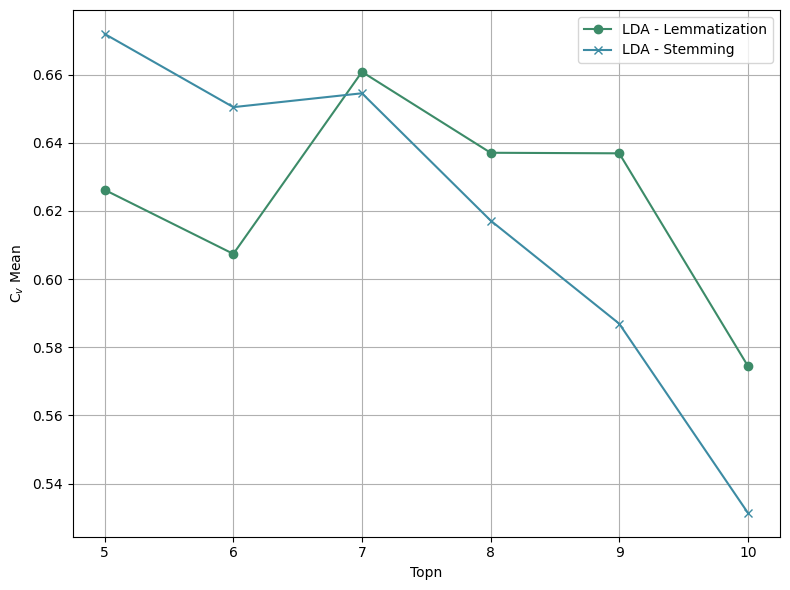

In [11]:
# Filtrando os dados para cada categoria
lemmatization_data = df[df['nlp_normalization_method'] == 'lemmatization']
stemmer_data = df[df['nlp_normalization_method'] == 'stemmer']

# Criando o plot
plt.figure(figsize=(8, 6))
plt.plot(lemmatization_data['top_n'], lemmatization_data['c_v_mean'], label='LDA - Lemmatization', marker='o', color="#3c8b68")
plt.plot(stemmer_data['top_n'], stemmer_data['c_v_mean'], label='LDA - Stemming', marker='x', color="#3c8ba3")

# Adicionando título e legendas
plt.ylabel('C$_v$ Mean')
plt.xlabel('Topn')
plt.legend()

# Ajustes para melhorar a aparência no LaTeX
plt.grid(True)
plt.tight_layout()

# Salvando o gráfico em formato PDF
plt.savefig('/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/images/lda_cv.pdf')

# Mostrar o gráfico
plt.show()


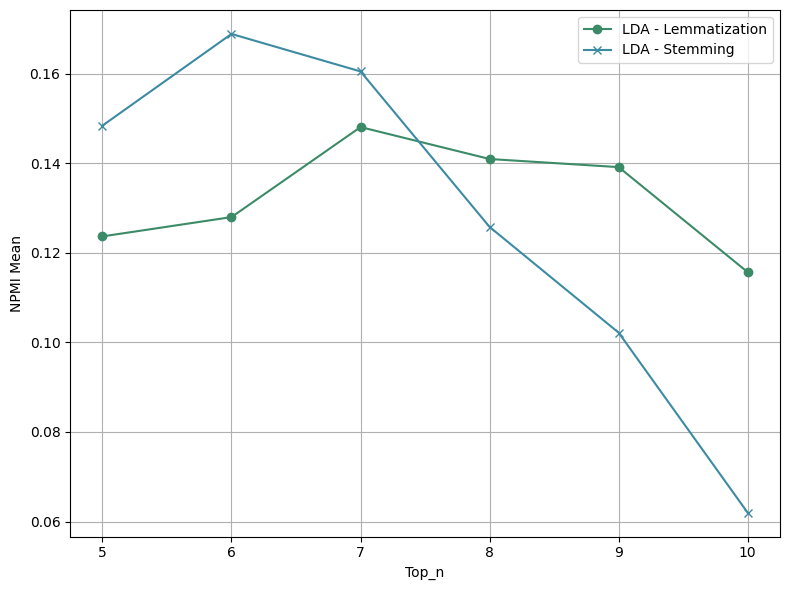

In [32]:
# Filtrando os dados para cada categoria
lemmatization_data = df[df['nlp_normalization_method'] == 'lemmatization']
stemmer_data = df[df['nlp_normalization_method'] == 'stemmer']

# Criando o plot
plt.figure(figsize=(8, 6))
plt.plot(lemmatization_data['top_n'], lemmatization_data['c_npmi_mean'], label='LDA - Lemmatization', marker='o', color="#3c8b68")
plt.plot(stemmer_data['top_n'], stemmer_data['c_npmi_mean'], label='LDA - Stemming', marker='x', color="#3c8ba3")

# Adicionando título e legendas
plt.ylabel('NPMI Mean')
plt.xlabel('Top_n')
plt.legend()

# Ajustes para melhorar a aparência no LaTeX
plt.grid(True)
plt.tight_layout()

# Salvando o gráfico em formato PDF
plt.savefig('/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/images/lda_npmi.pdf')

# Mostrar o gráfico
plt.show()


# Word Clouds

In [ ]:
stop_words = []

with open("src/utils/stop_words.txt", "r") as file:
    for row in file:
        stop_words.append(row.strip())

In [ ]:
# lda_model, vec, corpus, id2word = get_files("models/lda/stemmer/best_model_topn_6/pkl")
lda_model, vec, corpus, id2word = get_files("models/lda/lemmatization/best_model_topn_7/pkl")

# model_params_json = "src/lda_opt_outputs/results_stemmer_topn_6.json"
model_params_json = "src/lda_opt_outputs/results_lemmatization_topn_7.json"
params = get_json(model_params_json)

topn = params["topn"]
n_topics = params["params"]["num_topics"]
model_params = params["params"]

In [ ]:
word_cloud(stopwords=stop_words, 
           model=lda_model, 
           n_topics=n_topics, 
           max_words=topn,
        #    save_path="/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/images/lda_word_cloud_results_stemmer_topn_6.pdf"
           )

# Distributions

In [ ]:
# lda_model, vec, corpus, id2word = get_files("models/lda/stemmer/best_model_topn_6/pkl")
lda_model, vec, corpus, id2word = get_files("models/lda/lemmatization/best_model_topn_7/pkl")

# model_params_json = "src/lda_opt_outputs/results_stemmer_topn_6.json"
model_params_json = "src/lda_opt_outputs/results_lemmatization_topn_7.json"
params = get_json(model_params_json)

topn = params["topn"]
n_topics = params["params"]["num_topics"]
model_params = params["params"]

In [ ]:
topic_dist = get_topic_dist(lda_model, corpus)

In [ ]:
plot_lda_topic_dist(topic_dist, 
                    # save_path="/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/images/lda/lda_dist_results_lemmatization_topn_7.pdf"
                    )